# BREAST CANCER LOGISTIC REGRESSION FOR STATISTICAL DATA MINING CLASS

# INTRO 

<p>The objective of the project is to explore the sampled breast cancer data from the Wisconsin Breast Cancer database and predict if a tumor is benign or malignant. The data mainly describes the properties of the cell and its class. The model used for the prediction is a logistic regression regularized by L1  to avoid over-fitting. The best features for the regression were selected by using a Recursive Feature Elimination model which given the logistic regression model assigns weights to the features (predictors) to select the features with higher importance. </p>

In [66]:
# LIBRARIES

# DATA 
import pandas as pd
import numpy as np

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns


# LEARNING LIBRARIES

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Accuracy 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [3]:
# DATA 

df = pd.read_csv("BreastCancer.csv",header=0,sep=',')
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


# Sample and Basic Information
The data sampled contains 699 observations. The target variable is the cell Class and the predictors are clump thickness, cell size, cell shape, marginal adhesion, epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses. 

The data set has 699 observations of which Bare.Nuclei contains missing values.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Id                 699 non-null int64
Cl.thickness       699 non-null int64
Cell.size          699 non-null int64
Cell.shape         699 non-null int64
Marg.adhesion      699 non-null int64
Epith.c.size       699 non-null int64
Bare.nuclei        683 non-null float64
Bl.cromatin        699 non-null int64
Normal.nucleoli    699 non-null int64
Mitoses            699 non-null int64
Class              699 non-null object
dtypes: float64(1), int64(9), object(1)
memory usage: 60.1+ KB


## HISTOGRAMS

**A quick  look at the variables histogram will show the behavior of the variables and the frequency distribution of each of the predictor variables. It is interesting to see how most variables tend to fall in between 2-6 and only a few tend to fall in the brackets greater than 4.**

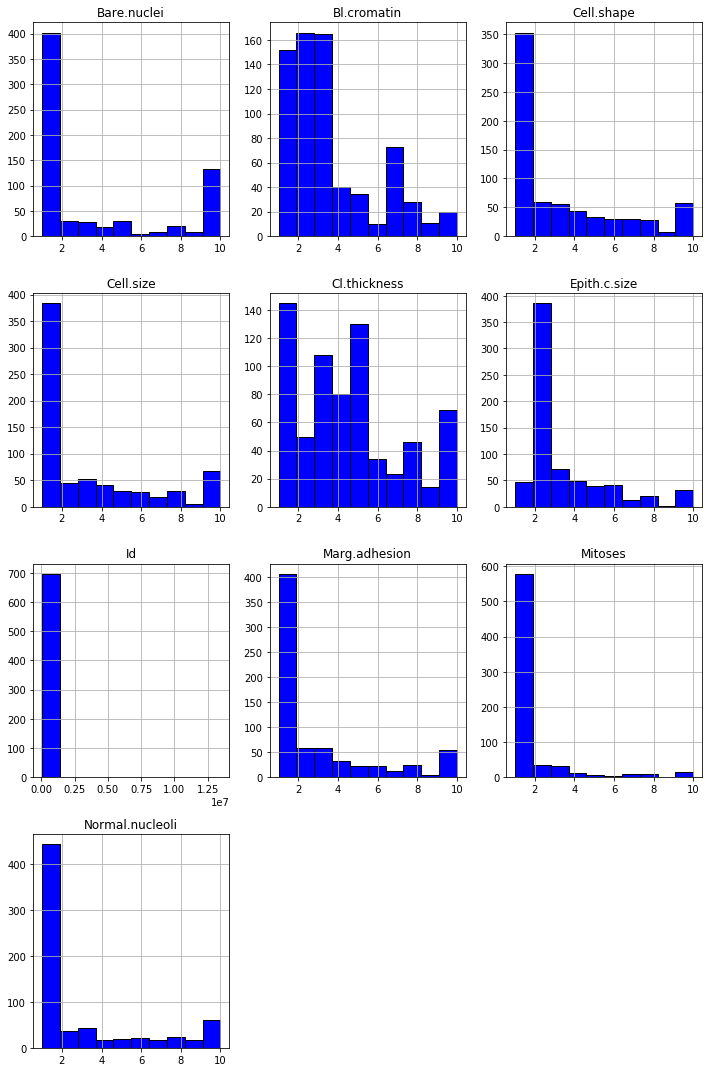

In [4]:
# DATA DISTRIBUTION OF NUMERICAL VARIABLES

fig1 = df.hist(figsize=(10,15),color='b',ec='k')
plt.tight_layout()
plt.show()

# Target Variable 

If we take a look at the **Class variable** value counts we can see that there are more observations for the benign class than for the malignant class.

If most variables tend to fall in-between the **2-6 brackets  on the histograms** and because there are more observations classified as benign, the **smaller** the cell size/properties the less likely it is to be a cancerous cell and the **bigger** the cell, the more likely it is to be a malignant cell.  

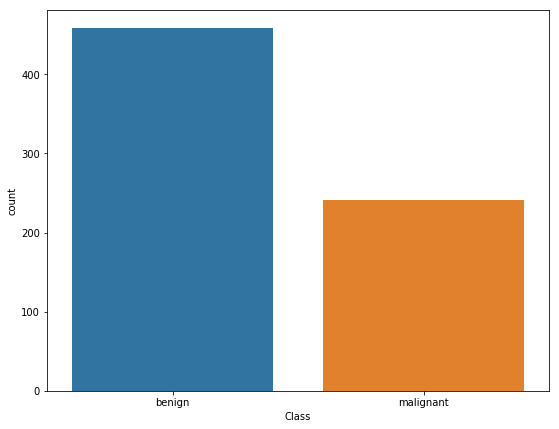

In [8]:
plt.figure(figsize=(9,7))
sns.countplot(x='Class',data=df)
plt.show()

In [10]:
# VALUE COUNTS FOR THE TARGET VARIABLE 

df['Class'].value_counts()

benign       458
malignant    241
Name: Class, dtype: int64

In [12]:
# MAKE SURE THEY ARE UNIQUE 

df.Class.unique()

array(['benign', 'malignant'], dtype=object)

In [9]:
# CREATE DUMMY TARGET VARIABLES FOR ANALYSIS

df['Class_Dummy'] = df.Class.apply(lambda x: 0 if (x == 'benign') else 1)
df.head()



,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class,Class_Dummy
0,1000025,5,1,1,1,2,1.0,3,1,1,benign,0
1,1002945,5,4,4,5,7,10.0,3,2,1,benign,0
2,1015425,3,1,1,1,2,2.0,3,1,1,benign,0
3,1016277,6,8,8,1,3,4.0,3,7,1,benign,0
4,1017023,4,1,1,3,2,1.0,3,1,1,benign,0


In [11]:
# Remove the class from the dummies data frame and create new df_dummies 

df_dummies = df.drop(columns='Class')
df_dummies.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class_Dummy
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [12]:
# Define Target and Feature Variables 

# Target Variable
y = 'Class_Dummy'

# Features/Predictors
X = [i for i in df_dummies.columns.tolist() if i not in y]
X

['Id',
 'Cl.thickness',
 'Cell.size',
 'Cell.shape',
 'Marg.adhesion',
 'Epith.c.size',
 'Bare.nuclei',
 'Bl.cromatin',
 'Normal.nucleoli',
 'Mitoses']

## Modification
It was observed that the dataset contains 699 observations but Bare.Nuclei only contains 683 observations that have a value indicated. For this reason, the observations that had no value for Bare.Nuclei were eliminated and only 683 observations were considered for the model. 


In [13]:
# MAKE SURE THERE ARE NO MISSING VALUES IN THE NEW DATASET THAT CONTAINS THE FEATURES/PREDICTORS

data = df_dummies[X[1:]]
data_nonull = data.dropna(axis=0)
data_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 9 columns):
Cl.thickness       683 non-null int64
Cell.size          683 non-null int64
Cell.shape         683 non-null int64
Marg.adhesion      683 non-null int64
Epith.c.size       683 non-null int64
Bare.nuclei        683 non-null float64
Bl.cromatin        683 non-null int64
Normal.nucleoli    683 non-null int64
Mitoses            683 non-null int64
dtypes: float64(1), int64(8)
memory usage: 53.4 KB


#### SMALLER VS BIGGER CELLS

- To confirm the assumption, a crosstab of the variables was created to observe **the behavior of malignant vs benign cells**. The class variable was encoded into a binary classification of 0 and 1. **0** represents the **benign tumors** and **1** represents the **malignant** tumors/cells. 

- Malignant cases for cell thickness seem to corroborate the assumption that the higher the value in size and/or a cell property the more likely it is for that cell to be malignant. It can be observed that most malignant cells fall under the brackets 7-10.

- The same trends are reflected when the cell size, cell shape and Epith size are compared against the cell class. Most malignant cells tend to fall on the high numbers.



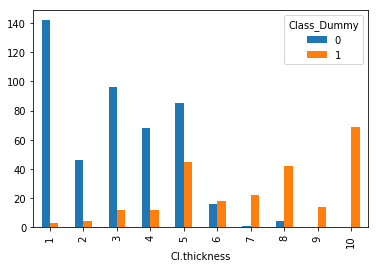

In [17]:
pd.crosstab(df_dummies['Cl.thickness'],df_dummies.Class_Dummy).plot(kind='bar')
plt.show()

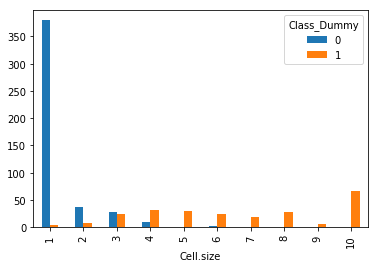

In [18]:
pd.crosstab(df_dummies['Cell.size'],df_dummies.Class_Dummy).plot(kind='bar')
plt.show()

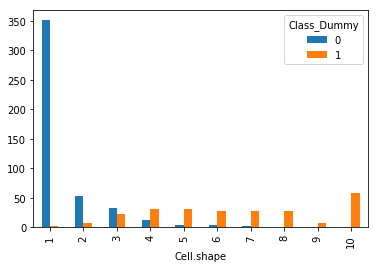

In [19]:
pd.crosstab(df_dummies['Cell.shape'],df_dummies.Class_Dummy).plot(kind='bar')
plt.show()

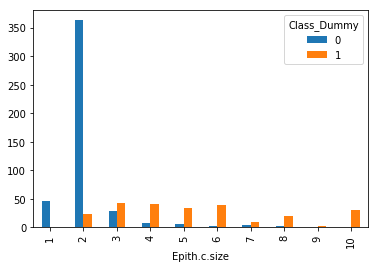

In [20]:
pd.crosstab(df_dummies['Epith.c.size'],df_dummies.Class_Dummy).plot(kind='bar')
plt.show()

### Select Predictors and Target Variable 

In [30]:
print('Predictors: \n')
[print(i) for i in X]
print('_'*40)
print('Outcome is {}'.format(y))

Predictors: 

Id
Cl.thickness
Cell.size
Cell.shape
Marg.adhesion
Epith.c.size
Bare.nuclei
Bl.cromatin
Normal.nucleoli
Mitoses
________________________________________
Outcome is Class_Dummy


## Model
#### Recursive Feature Elimination (RFE)

- The **Recursive Feature Elimination** technique helps assess the importance of the variables for the model at hand. In this case, the model being used to predict the cell class is a logistic regression. The RFE assigns weights and the user must determine how many features are to be eliminated to improve the accuracy of the prediction in relation to the model.   

- The RFE returns a raking a set of variables that are deemed the most important for the model accuracy.  Different number of features were selected to determine which number of features returned the most accurate model. If all 9 features are used, accuracy lies around 50% percent, if 8 features are used, accuracy increases to 60% but it is not the highest possible. When 7 features were selected, almost 70% accuracy with 0% sparsity was reached  by the prediction . Less features were fitted, but when 5 features were selected, the prediction accuracy went back down to 55-60 %, thus 7 features appear to be the optimal number of features. The following features were selected as the most important features to predict the class variable:

    - a.	Column Name: Cl.thickness
    - b.	Column Name: Cell.size
    - c.	Column Name: Cell.shape
    - d.	Column Name: Epith.c.size
    - e.	Column Name: Normal.nucleoli
    - f.	Column Name: Bl.cromatin
    - g.	Column Name: Mitoses


### APPLY RFE FOR FEATURE SELECTION

In [60]:
# model being used 

model = LogisticRegression()

rfe = RFE(model,7)
rfe = rfe.fit(data_nonull,df_dummies['Class_Dummy'][:683])
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True False  True  True  True]
[1 1 1 3 1 2 1 1 1]


In [61]:
for i in data_nonull.columns[rfe.support_].tolist():
    print('Column Name: {}'.format(i))

Column Name: Cl.thickness
Column Name: Cell.size
Column Name: Cell.shape
Column Name: Epith.c.size
Column Name: Bl.cromatin
Column Name: Normal.nucleoli
Column Name: Mitoses


## Data Split
The dataset was split into a 2:1:1 ratio with even shape. The data shape resulted in the following:

- The dataset with no-null values contains 683 observations and  the 6 variables (predictors) selected by the RFE. The outcome class (Target) contains 683 observations with 1 variable. After the data was split into a 2:1:1 ratio, the X (predictors) and the y (target)  shapes resulted as follow:
    - 1.	X data shape (341, 7) (171, 7) (171, 7)
    - 2.	Y data shape (341,) (171,) (171,)


In [62]:
X = data_nonull[data_nonull.columns[rfe.support_].tolist()]
y = df_dummies['Class_Dummy'][:683]
print(X.shape,y.shape)

(683, 7) (683,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.5)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=.5)

print('X data shape',X_train.shape,X_test.shape,X_val.shape)
print('Y data shape',y_train.shape,y_test.shape,y_val.shape)

X data shape (341, 7) (171, 7) (171, 7)
Y data shape (341,) (171,) (171,)


### LOGISTIC REGRESSION Mode with Different Regularization Penalties

- After determining the best model, the training and validation sets were integrated transforming the data into a ratio of 2:1. - The following information shows the ROC curve for each regularization parameter along with is accuracy and sparsity. C represents the inverse of regularization strength.


C: 100
Logistic Regression accuracy with 100 : 0.708
Coefficient of each feature: [ 0.10501983 -0.1091534  -0.04160512  0.19388784 -0.06739029  0.04423899
 -0.13791946]
Sparsity with L1 penalty: 0.00%
Training accuracy: 0.6539589442815249
Test accuracy: 0.7076



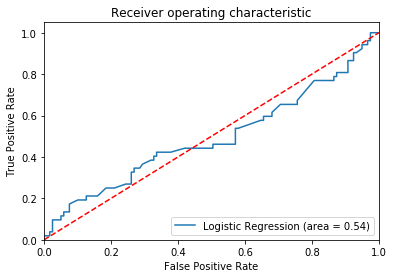

C: 10
Logistic Regression accuracy with 10 : 0.708
Coefficient of each feature: [ 0.1012273  -0.10996633 -0.03850788  0.19225844 -0.06627639  0.04438596
 -0.13625639]
Sparsity with L1 penalty: 0.00%
Training accuracy: 0.6510263929618768
Test accuracy: 0.7076



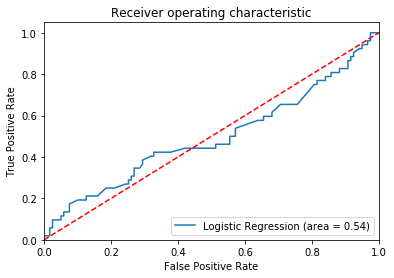

C: 1
Logistic Regression accuracy with 1 : 0.708
Coefficient of each feature: [ 0.0942164  -0.08306715 -0.04740726  0.17210626 -0.06514836  0.03601248
 -0.12925511]
Sparsity with L1 penalty: 0.00%
Training accuracy: 0.6422287390029325
Test accuracy: 0.7076



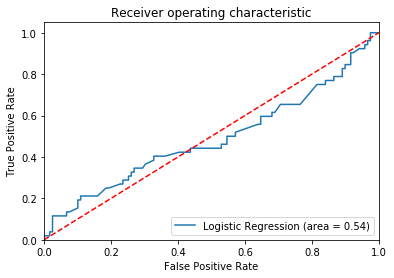

C: 0.5
Logistic Regression accuracy with 0.5 : 0.702
Coefficient of each feature: [ 0.08021023 -0.08196965 -0.02941531  0.15677555 -0.06539693  0.0302256
 -0.12182161]
Sparsity with L1 penalty: 0.00%
Training accuracy: 0.6422287390029325
Test accuracy: 0.7018



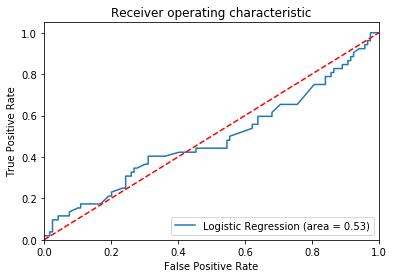

C: 0.1
Logistic Regression accuracy with 0.1 : 0.696
Coefficient of each feature: [ 0.          0.          0.          0.01910084 -0.05285227  0.
 -0.07273061]
Sparsity with L1 penalty: 57.14%
Training accuracy: 0.6392961876832844
Test accuracy: 0.6959



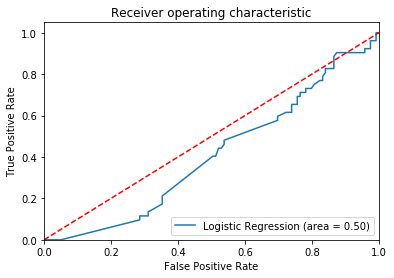

C: 0.01
Logistic Regression accuracy with 0.01 : 0.696
Coefficient of each feature: [-0.00829368  0.          0.          0.         -0.03637306  0.
  0.        ]
Sparsity with L1 penalty: 71.43%
Training accuracy: 0.6392961876832844
Test accuracy: 0.6959



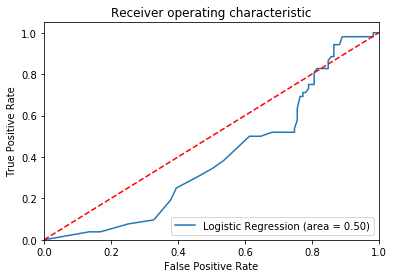

C: 0.001
Logistic Regression accuracy with 0.001 : 0.696
Coefficient of each feature: [0. 0. 0. 0. 0. 0. 0.]
Sparsity with L1 penalty: 100.00%
Training accuracy: 0.6392961876832844
Test accuracy: 0.6959



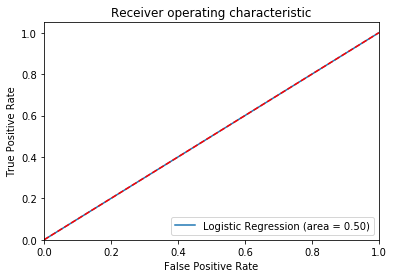

C: 0.0001
Logistic Regression accuracy with 0.0001 : 0.696
Coefficient of each feature: [0. 0. 0. 0. 0. 0. 0.]
Sparsity with L1 penalty: 100.00%
Training accuracy: 0.6392961876832844
Test accuracy: 0.6959



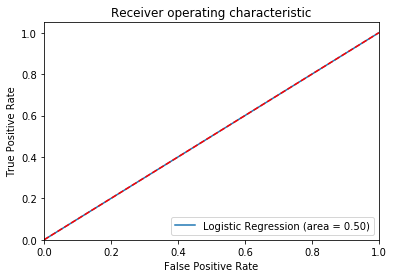

In [68]:
C = [100,10, 1, .5, .1, .01, .001,.0001]
for c in C:
    logreg = LogisticRegression(penalty='l1', C=c, tol=0.01)
    logreg.fit(X_train, y_train)
    
    coef_l1_LR =  logreg.coef_.ravel()
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100

    print('C:', c)
    print('Logistic Regression accuracy with {} : {:.3f}'.format(c,accuracy_score(y_test,
                            logreg.predict(X_test))))
    print('Coefficient of each feature:', coef_l1_LR)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print('Training accuracy:', logreg.score(X_train, y_train))
    print('Test accuracy: %.4f' % logreg.score(X_test, y_test))
    print('')
    
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

